In [1]:
!pip install PubChemPy
!pip install rdkit-pypi
!pip install deepchem
import torch
!pip install torchmetrics
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html



  Preparing metadata (setup.py) ... done
  Created wheel for PubChemPy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=6bd662f13eb68236e8261cb027aeda476b37ab49cc66eccb8651a390daa059f4
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built PubChemPy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requi

In [14]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import torch
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import os
import networkx as nx
from rdkit.Chem import MolFromSmiles
import deepchem as dc
from rdkit import Chem
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# loading BRR-ISB classes
from preprocessing import *
from drugomcisdataset import *
from isb import *
from gnn_model import *
from model_evaluation import *


# **Loading data**

In [3]:
df_ic50 = get_IC50_data()
df_drugs= get_drug_data()
df_rna, df_snv,df_cnv, df_omics,rna_BRR,snv_BRR,cnv_BRR = get_multi_omics()
del rna_BRR['Cell_Lines']
del snv_BRR['Cell_Lines']
del cnv_BRR['Cell_Lines']

# **ISB**

In [4]:
data = [rna_BRR,snv_BRR,cnv_BRR]
isb = iterative_similarity_bagging(data=data, k=300,threshold_method='half_mean',iterations=10,distance_metric='euclidean')

omics, df_integrated_omics = isb.integrating_data('Cell_Lines')
df_integrated_omics['Cell_Lines'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362],['42-MG-BA', '5637', '639-V', '697', '769-P', '8-MG-BA', '8505C', 'A172', 'A2058', 'A2780', 'A549', 'ACHN', 'AMO-1', 'AsPC-1', 'AU565', 'BFTC-909', 'BL-41', 'BL-70', 'BT-20', 'BT-474', 'BT-549', 'BxPC-3', 'C2BBe1', 'C32', 'C3A', 'Caki-2', 'CAL-12T', 'CAL-85-1', 'Calu-1', 'Calu-3', 'Calu-6', 'CAMA-1', 'Capan-2', 'CAS-1', 'CCK-81', 'CHL-1', 'CHP-212', 'CMK-86', 'COLO-678', 'COLO-679', 'COR-L23', 'COV318', 'COV504', 'Daoy', 'DBTRG-05MG', 'DEL', 'DK-MG', 'DOHH-2', 'DV-90', 'EB2', 'EBC-1', 'EFE-184', 'EFM-19', 'EFO-21', 'EFO-27', 'EM-2', 'EN', 'ES-2', 'ESS-1', 'F-36P', 'FU-OV-1', 'FU97', 'G-361', 'G-401', 'G-402', 'GAMG', 'GCIY', 'GCT', 'GI-1', 'GMS-10', 'GRANTA-519', 'H4', 'HARA', 'HCC-15', 'HCC-44', 'HCC-56', 'HCC-78', 'HCC1187', 'HCC1395', 'HCC1569', 'HCC1806', 'HCC1954', 'HCC2935', 'HCC4006', 'HCC70', 'HCC827', 'HCT-15', 'HD-MY-Z', 'HEC-1-A', 'HEC-151', 'HEC-251', 'HEC-265', 'HEC-59', 'HEC-6', 'Hep G2', 'Hey-A8', 'HGC-27', 'HH', 'HLF', 'HOS', 'HPAC', 'HPAF-II', 'Hs 294T', 'Hs 683', 'Hs 695T', 'Hs 729', 'Hs 746T', 'Hs 766T', 'Hs 852.T', 'Hs 936.T', 'Hs 939.T', 'Hs 944.T', 'HSC-2', 'HT-1080', 'HT-1197', 'HT-1376', 'HT-144', 'HT-29', 'HuCCT1', 'HuT 78', 'IA-LM', 'IGR-37', 'IPC-298', 'Ishikawa (Heraklio) 02 ER-', 'IST-MES1', 'IST-MES2', 'J82', 'JHH-2', 'JHH-4', 'JHH-5', 'JHH-6', 'JHH-7', 'JHOS-2', 'JHOS-4', 'JHUEM-2', 'JM1', 'JMSU-1', 'JVM-3', 'K029AX', 'KALS-1', 'KARPAS-620', 'KCI-MOH1', 'KCL-22', 'KE-39', 'KE-97', 'KG-1', 'KHM-1B', 'KLE', 'KMBC-2', 'KMM-1', 'KMRC-1', 'KMRC-2', 'KMS-11', 'KMS-12-BM', 'KMS-26', 'KMS-34', 'KNS-42', 'KNS-60', 'KNS-62', 'KP-2', 'KP-3', 'KU812', 'KURAMOCHI', 'KYM-1', 'KYSE-140', 'KYSE-150', 'KYSE-180', 'KYSE-30', 'KYSE-410', 'KYSE-450', 'KYSE-510', 'KYSE-520', 'KYSE-70', 'L-363', 'L-428', 'L3.3', 'LC-1/sq-SF', 'LCLC-103H', 'LN-18', 'LN-229', 'LOU-NH91', 'LP-1', 'LUDLU-1', 'Malme-3M', 'MCAS', 'MCF7', 'MDA-MB-415', 'MDA-MB-436', 'MDA-MB-453', 'MEC-1', 'MEL-HO', 'MFE-280', 'MFE-296', 'MG-63', 'MHH-ES-1', 'Mino', 'MJ', 'MKN7', 'MKN74', 'MOLP-8', 'MOLT-16', 'MONO-MAC-1', 'MOR/CPR', 'MSTO-211H', 'NCI-H1048', 'NCI-H1155', 'NCI-H1299', 'NCI-H1339', 'NCI-H1341', 'NCI-H1355', 'NCI-H1373', 'NCI-H1563', 'NCI-H1568', 'NCI-H1573', 'NCI-H1581', 'NCI-H1648', 'NCI-H1650', 'NCI-H1651', 'NCI-H1666', 'NCI-H1693', 'NCI-H1694', 'NCI-H1703', 'NCI-H1792', 'NCI-H1793', 'NCI-H1869', 'NCI-H1915', 'NCI-H1944', 'NCI-H1975', 'NCI-H2009', 'NCI-H2023', 'NCI-H2030', 'NCI-H2052', 'NCI-H2087', 'NCI-H211', 'NCI-H2122', 'NCI-H2170', 'NCI-H2172', 'NCI-H2228', 'NCI-H226', 'NCI-H2286', 'NCI-H23', 'NCI-H2444', 'NCI-H2452', 'NCI-H28', 'NCI-H358', 'NCI-H441', 'NCI-H460', 'NCI-H520', 'NCI-H522', 'NCI-H650', 'NCI-H661', 'NCI-H727', 'NCI-H747', 'NCI-H810', 'NCI-N87', 'NCO2', 'NUGC-3', 'NUGC-4', 'OC 316', 'OCI-AML2', 'OCI-AML5', 'OE33', 'ONS-76', 'OPM-2', 'OV-90', 'OVCAR-4', 'OVCAR-8', 'OVMANA', 'OVSAHO', 'OVTOKO', 'P12-ICHIKAWA', 'P3HR-1', 'PA-TU-8902', 'Panc 02.03', 'Panc 04.03', 'PC-14', 'PC-3', 'Pfeiffer', 'PK-1', 'PK-45H', 'PK-59', 'PL45', 'PSN1', 'QGP-1', 'Raji', 'RD', 'RERF-GC-1B', 'RERF-LC-MS', 'RKO', 'RL95-2', 'RPMI-7951', 'RPMI-8402', 'RT-112', 'RT4', 'RVH-421', 'SBC-5', 'SCaBER', 'SCC-9', 'SF126', 'SH-10-TC', 'SHP-77', 'SIG-M5', 'SIMA', 'SJRH30', 'SJSA-1', 'SK-BR-3', 'SK-CO-1', 'SK-ES-1', 'SK-HEP-1', 'SK-LMS-1', 'SK-LU-1', 'SK-MEL-2', 'SK-MEL-24', 'SK-MEL-30', 'SK-MEL-5', 'SK-MES-1', 'SK-N-AS', 'SK-N-DZ', 'SK-N-FI', 'SK-N-SH', 'SK-OV-3', 'SNG-M', 'SNU-182', 'SNU-C2A', 'Sq-1', 'SU-DHL-10', 'SU-DHL-4', 'SU-DHL-6', 'SU-DHL-8', 'SUIT-2', 'SUP-M2', 'SUP-T1', 'SW 1271', 'SW 1353', 'SW1417', 'SW48', 'SW480', 'SW579', 'SW620', 'T84', 'T98G', 'TC-71', 'TCCSUP', 'TE-5', 'TE-9', 'TEN', 'Toledo', 'TOV-112D', 'TOV-21G', 'TT2609-C02', 'TYK-nu', 'U-937', 'UACC-62', 'UACC-812', 'UM-UC-3', 'VMRC-RCZ', 'WM-115', 'WM-266-4', 'WM-793', 'WM-88', 'WM-983B', 'WM1799', 'ZR-75-30'],
                              inplace=True)
df_integrated_omics

,Cell_Lines,MOK,WLS_x,CLIC3,CYP1B1_x,EDIL3,MLF1,NANOS1,SOX11,CXCL6,...,PTPRD-AS1,LINC00408,SRSF6,ITGA6_y,NKAIN2,MIR1208,DOCK9-AS2,ADAMTS3,ST13,ZBTB22
0,42-MG-BA,6.081980,10.375782,4.150382,8.554277,9.150456,8.575767,7.715567,8.180831,3.909679,...,0.85215,0.50608,1.04486,0.90253,0.67416,0.82340,0.50608,0.63939,0.73640,0.67416
1,5637,7.017504,9.573340,3.665178,5.669042,4.477832,7.047965,7.102886,3.683733,10.612357,...,1.03552,0.53400,0.95049,0.78484,0.81917,0.73836,1.03535,0.55457,0.79618,0.52659
2,639-V,10.469009,8.584185,3.724760,4.244010,5.800868,9.800605,5.164811,3.881054,3.801142,...,0.72133,0.88512,1.05192,0.67188,0.87543,0.92845,0.88512,0.69664,1.04956,0.87543
3,697,8.043542,3.934450,3.891775,4.253569,4.773978,4.787963,5.164642,8.685346,3.621451,...,0.86091,0.82154,0.79121,0.79310,0.39940,1.03857,0.82154,0.80080,0.90606,0.79826
4,769-P,5.407182,7.823107,3.692883,4.144238,5.263656,6.636440,6.206447,3.751495,3.734221,...,0.80438,0.78218,0.73491,0.76193,0.74955,1.02945,0.78869,0.78346,0.83141,0.76298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,WM-793,11.549735,9.363649,3.539336,7.359857,4.888181,8.488597,6.153155,3.659266,4.072215,...,0.69369,0.68440,0.99326,0.89574,0.71748,0.82213,0.68440,0.69674,0.67222,0.71748
359,WM-88,10.213064,8.231410,3.739477,4.107425,4.969206,8.441073,10.408115,3.749049,4.104387,...,0.37519,0.91015,1.02288,0.84662,0.70669,0.63855,0.91015,0.75455,0.73546,0.82720
360,WM-983B,7.274885,9.234453,3.784688,4.006669,5.311126,9.363000,6.061585,3.836235,3.789227,...,0.35138,0.60880,1.21502,0.88457,0.68191,1.02377,0.64572,0.70442,0.88587,0.79567
361,WM1799,8.753378,8.897160,3.541153,4.493657,4.975493,8.303003,9.717947,3.616015,3.811336,...,0.70042,1.17699,0.92511,0.69174,0.71203,1.19054,1.17699,0.73015,1.07091,0.71203


**Splitting data into training, validation, and testing**

In [6]:
y_label, x_drug_train,x_drug_val,x_drug_test,x_omics_train,x_omics_val,x_omics_test,y_train,y_val,y_test = get_train_test_date(df_ic50,df_integrated_omics,df_drugs)

# **Creating Dataset**

In [11]:
%rm -rf data

In [8]:
training_set = DrugOmcisDataset(root='data/', dataset='train0', x_omics=x_omics_train, x_drug=x_drug_train, y=y_train)
validation_set = DrugOmcisDataset(root='data/', dataset='val0', x_omics=x_omics_val, x_drug=x_drug_val, y=y_val)
testing_set = DrugOmcisDataset(root='data/', dataset='test0', x_omics=x_omics_test, x_drug=x_drug_test, y=y_test)


# **Training**

In [9]:
import torch
from tqdm import tqdm
from torch_geometric.loader import DataLoader
from gnn_model import *
from model_evaluation import *

def train_one_epoch(model, train_loader, device,epoch,optimizer,criterion):
  total_loss = 0
  train_preds = torch.Tensor()
  train_targets = torch.Tensor()

  print('epoch {}, Training samples {}'.format(str(epoch),len(train_loader.dataset)))
  # Train on batches
  for _, data in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            data = data.to(device)
            out, x = model(data)
            loss = criterion(out, data.y.view(-1, 1).float().to(device))
            total_loss += loss.item()
            train_preds = torch.cat((train_preds, out.cpu().detach()), 0)
            train_targets = torch.cat((train_targets, data.y.view(-1, 1).cpu().detach()), 0)

            loss.backward()
            optimizer.step()

  return total_loss, train_preds,train_targets


def test(model, test_loader, device):
    criterion = torch.nn.MSELoss()
    model.eval()
    loss = 0
    test_preds = torch.Tensor()
    test_targets = torch.Tensor()
    with torch.no_grad():
      for _, data in enumerate(tqdm(test_loader)):
        data = data.to(device)
        out, x = model(data)
        loss += criterion(out, data.y.view(-1, 1).float().to(device)).item()
        test_preds = torch.cat((test_preds, out.cpu()), 0)
        test_targets = torch.cat((test_targets, data.y.view(-1, 1).cpu()), 0)

    return loss, test_preds,test_targets



def start_training(epochs,batch):
  training_losses=[]
  validation_losses=[]
  training_rmse=[]
  validation_rmse=[]
  training_corr=[]
  validation_corr=[]

  cuda= "cuda:0"
  best_val_loss = 1_000_000.

  train_loader = DataLoader(training_set, batch_size=batch, shuffle=True)
  val_loader = DataLoader(validation_set, batch_size=batch, shuffle=False)
  test_loader = DataLoader(testing_set, batch_size=batch, shuffle=False)

  # training the model
  device = torch.device(cuda if torch.cuda.is_available() else "cpu")
  model = GNN_Model().to(device)

  criterion = torch.nn.MSELoss()
  #optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
  #optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  #optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)



  model.train()
  for epoch in range(epochs+1):
    train_loss, train_preds,train_targets = train_one_epoch(model,train_loader,device,epoch,optimizer,criterion)
    train_loss_value,train_mse,train_rmse,train_pearsonr =\
    print_results('Training',epoch,train_loss/len(train_loader),train_preds,train_targets)

    val_loss, val_preds, val_targets = test(model, val_loader,device)
    val_loss_value,val_mse,val_rmse,val_pearsonr= print_results('Validation',epoch,val_loss/len(val_loader),val_preds,val_targets)

    training_losses.append(train_loss / len(train_loader))
    validation_losses.append(val_loss / len(val_loader))
    training_rmse.append("{:.3f}".format(rmse(train_preds,train_targets)))
    validation_rmse.append("{:.3f}".format(rmse(val_preds,val_targets)))
    training_corr.append("{:.3f}".format(pearsonr(train_preds,train_targets)))
    validation_corr.append("{:.3f}".format(pearsonr(val_preds,val_targets)))


    # test_loss, test_preds, test_targets = test(model, test_loader,device)
    # print_results('Testing',epoch,test_loss/len(test_loader),test_preds,test_targets)
    avg_val_loss = val_loss/len(val_loader)
    if avg_val_loss < best_val_loss:
          best_val_loss = avg_val_loss
          model_path = 'best_model'
          torch.save(model.state_dict(), model_path)




  saved_model = GNN_Model().to(device)
  saved_model.load_state_dict(torch.load('/content/best_model'))
  # Final Results
  print(f'----------------------')
  print(f'Best Model')
  # Training results
  printResultsCV(saved_model,training_set,device,'Training',10)
  # val results
  printResultsCV(saved_model,validation_set,device,'Validation',10)
  # test results
  printResultsCV(saved_model,testing_set,device,'Testing',10)

  # draw charts
  draw_polt(training_losses,validation_losses,'Train Loss', 'Val Loss')
  draw_polt(training_rmse,validation_rmse, 'Train RMSE', 'Val RMSE')
  draw_polt(training_corr,validation_corr, 'Train PCC', 'Val PCC')
  draw_one_chart(validation_corr,'Pearson correlation coefficient', 'Val PCC')




/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


epoch 0, Training samples 7056


100%|██████████| 221/221 [00:04<00:00, 54.48it/s]


----------------------
epoch= 0
Training Total Loss: 0.071
Training MSE: 0.072
Training RMSE: 0.267
Training Pearsons correlation: 0.027


100%|██████████| 25/25 [00:00<00:00, 35.75it/s]
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The variance of predictions or target is close to zero. This can cause instability in Pearson correlationcoefficient, leading to wrong results. Consider re-scaling the input if possible or computing using alarger dtype (currently using torch.float32).
  warnings.warn(*args, **kwargs)  # noqa: B028


----------------------
epoch= 0
Validation Total Loss: 0.056
Validation MSE: 0.056
Validation RMSE: 0.237
Validation Pearsons correlation: 0.144
epoch 1, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.06it/s]


----------------------
epoch= 1
Training Total Loss: 0.060
Training MSE: 0.061
Training RMSE: 0.246
Training Pearsons correlation: 0.086


100%|██████████| 25/25 [00:00<00:00, 90.86it/s]


----------------------
epoch= 1
Validation Total Loss: 0.056
Validation MSE: 0.056
Validation RMSE: 0.236
Validation Pearsons correlation: 0.146
epoch 2, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.94it/s]


----------------------
epoch= 2
Training Total Loss: 0.060
Training MSE: 0.060
Training RMSE: 0.245
Training Pearsons correlation: 0.120


100%|██████████| 25/25 [00:00<00:00, 89.17it/s]


----------------------
epoch= 2
Validation Total Loss: 0.056
Validation MSE: 0.056
Validation RMSE: 0.237
Validation Pearsons correlation: 0.150
epoch 3, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.33it/s]


----------------------
epoch= 3
Training Total Loss: 0.060
Training MSE: 0.060
Training RMSE: 0.245
Training Pearsons correlation: 0.120


100%|██████████| 25/25 [00:00<00:00, 89.20it/s]


----------------------
epoch= 3
Validation Total Loss: 0.056
Validation MSE: 0.055
Validation RMSE: 0.236
Validation Pearsons correlation: 0.155
epoch 4, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.82it/s]


----------------------
epoch= 4
Training Total Loss: 0.060
Training MSE: 0.060
Training RMSE: 0.245
Training Pearsons correlation: 0.130


100%|██████████| 25/25 [00:00<00:00, 91.91it/s]


----------------------
epoch= 4
Validation Total Loss: 0.056
Validation MSE: 0.056
Validation RMSE: 0.236
Validation Pearsons correlation: 0.163
epoch 5, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.36it/s]


----------------------
epoch= 5
Training Total Loss: 0.060
Training MSE: 0.060
Training RMSE: 0.245
Training Pearsons correlation: 0.131


100%|██████████| 25/25 [00:00<00:00, 90.57it/s]


----------------------
epoch= 5
Validation Total Loss: 0.055
Validation MSE: 0.055
Validation RMSE: 0.235
Validation Pearsons correlation: 0.184
epoch 6, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.99it/s]


----------------------
epoch= 6
Training Total Loss: 0.060
Training MSE: 0.060
Training RMSE: 0.244
Training Pearsons correlation: 0.179


100%|██████████| 25/25 [00:00<00:00, 89.26it/s]


----------------------
epoch= 6
Validation Total Loss: 0.055
Validation MSE: 0.055
Validation RMSE: 0.234
Validation Pearsons correlation: 0.212
epoch 7, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.67it/s]


----------------------
epoch= 7
Training Total Loss: 0.059
Training MSE: 0.059
Training RMSE: 0.243
Training Pearsons correlation: 0.207


100%|██████████| 25/25 [00:00<00:00, 87.30it/s]


----------------------
epoch= 7
Validation Total Loss: 0.055
Validation MSE: 0.054
Validation RMSE: 0.233
Validation Pearsons correlation: 0.270
epoch 8, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.86it/s]


----------------------
epoch= 8
Training Total Loss: 0.058
Training MSE: 0.058
Training RMSE: 0.241
Training Pearsons correlation: 0.280


100%|██████████| 25/25 [00:00<00:00, 89.95it/s]


----------------------
epoch= 8
Validation Total Loss: 0.053
Validation MSE: 0.053
Validation RMSE: 0.230
Validation Pearsons correlation: 0.351
epoch 9, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.36it/s]


----------------------
epoch= 9
Training Total Loss: 0.055
Training MSE: 0.055
Training RMSE: 0.235
Training Pearsons correlation: 0.377


100%|██████████| 25/25 [00:00<00:00, 87.55it/s]


----------------------
epoch= 9
Validation Total Loss: 0.050
Validation MSE: 0.049
Validation RMSE: 0.222
Validation Pearsons correlation: 0.448
epoch 10, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.06it/s]


----------------------
epoch= 10
Training Total Loss: 0.049
Training MSE: 0.049
Training RMSE: 0.221
Training Pearsons correlation: 0.496


100%|██████████| 25/25 [00:00<00:00, 81.82it/s]


----------------------
epoch= 10
Validation Total Loss: 0.043
Validation MSE: 0.043
Validation RMSE: 0.206
Validation Pearsons correlation: 0.546
epoch 11, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.84it/s]


----------------------
epoch= 11
Training Total Loss: 0.040
Training MSE: 0.040
Training RMSE: 0.199
Training Pearsons correlation: 0.611


100%|██████████| 25/25 [00:00<00:00, 88.24it/s]


----------------------
epoch= 11
Validation Total Loss: 0.034
Validation MSE: 0.034
Validation RMSE: 0.184
Validation Pearsons correlation: 0.650
epoch 12, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.58it/s]


----------------------
epoch= 12
Training Total Loss: 0.032
Training MSE: 0.032
Training RMSE: 0.179
Training Pearsons correlation: 0.699


100%|██████████| 25/25 [00:00<00:00, 85.40it/s]


----------------------
epoch= 12
Validation Total Loss: 0.029
Validation MSE: 0.029
Validation RMSE: 0.169
Validation Pearsons correlation: 0.722
epoch 13, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.12it/s]


----------------------
epoch= 13
Training Total Loss: 0.026
Training MSE: 0.026
Training RMSE: 0.161
Training Pearsons correlation: 0.767


100%|██████████| 25/25 [00:00<00:00, 90.52it/s]


----------------------
epoch= 13
Validation Total Loss: 0.022
Validation MSE: 0.022
Validation RMSE: 0.149
Validation Pearsons correlation: 0.794
epoch 14, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.34it/s]


----------------------
epoch= 14
Training Total Loss: 0.022
Training MSE: 0.022
Training RMSE: 0.148
Training Pearsons correlation: 0.805


100%|██████████| 25/25 [00:00<00:00, 89.27it/s]


----------------------
epoch= 14
Validation Total Loss: 0.019
Validation MSE: 0.019
Validation RMSE: 0.137
Validation Pearsons correlation: 0.827
epoch 15, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.48it/s]


----------------------
epoch= 15
Training Total Loss: 0.020
Training MSE: 0.020
Training RMSE: 0.141
Training Pearsons correlation: 0.823


100%|██████████| 25/25 [00:00<00:00, 85.27it/s]


----------------------
epoch= 15
Validation Total Loss: 0.022
Validation MSE: 0.022
Validation RMSE: 0.150
Validation Pearsons correlation: 0.843
epoch 16, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.89it/s]


----------------------
epoch= 16
Training Total Loss: 0.018
Training MSE: 0.018
Training RMSE: 0.135
Training Pearsons correlation: 0.838


100%|██████████| 25/25 [00:00<00:00, 89.19it/s]


----------------------
epoch= 16
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.128
Validation Pearsons correlation: 0.845
epoch 17, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.15it/s]


----------------------
epoch= 17
Training Total Loss: 0.017
Training MSE: 0.017
Training RMSE: 0.132
Training Pearsons correlation: 0.846


100%|██████████| 25/25 [00:00<00:00, 88.15it/s]


----------------------
epoch= 17
Validation Total Loss: 0.017
Validation MSE: 0.017
Validation RMSE: 0.129
Validation Pearsons correlation: 0.845
epoch 18, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 64.86it/s]


----------------------
epoch= 18
Training Total Loss: 0.018
Training MSE: 0.018
Training RMSE: 0.133
Training Pearsons correlation: 0.843


100%|██████████| 25/25 [00:00<00:00, 79.76it/s]


----------------------
epoch= 18
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.128
Validation Pearsons correlation: 0.849
epoch 19, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 63.42it/s]


----------------------
epoch= 19
Training Total Loss: 0.018
Training MSE: 0.018
Training RMSE: 0.133
Training Pearsons correlation: 0.843


100%|██████████| 25/25 [00:00<00:00, 87.93it/s]


----------------------
epoch= 19
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.128
Validation Pearsons correlation: 0.848
epoch 20, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.12it/s]


----------------------
epoch= 20
Training Total Loss: 0.017
Training MSE: 0.017
Training RMSE: 0.131
Training Pearsons correlation: 0.847


100%|██████████| 25/25 [00:00<00:00, 83.89it/s]


----------------------
epoch= 20
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.127
Validation Pearsons correlation: 0.852
epoch 21, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 64.26it/s]


----------------------
epoch= 21
Training Total Loss: 0.017
Training MSE: 0.017
Training RMSE: 0.129
Training Pearsons correlation: 0.853


100%|██████████| 25/25 [00:00<00:00, 84.10it/s]


----------------------
epoch= 21
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.859
epoch 22, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 64.45it/s]


----------------------
epoch= 22
Training Total Loss: 0.017
Training MSE: 0.017
Training RMSE: 0.129
Training Pearsons correlation: 0.853


100%|██████████| 25/25 [00:00<00:00, 88.27it/s]


----------------------
epoch= 22
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.856
epoch 23, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 64.93it/s]


----------------------
epoch= 23
Training Total Loss: 0.017
Training MSE: 0.017
Training RMSE: 0.129
Training Pearsons correlation: 0.853


100%|██████████| 25/25 [00:00<00:00, 88.01it/s]


----------------------
epoch= 23
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.858
epoch 24, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.37it/s]


----------------------
epoch= 24
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.127
Training Pearsons correlation: 0.857


100%|██████████| 25/25 [00:00<00:00, 89.87it/s]


----------------------
epoch= 24
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.857
epoch 25, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.19it/s]


----------------------
epoch= 25
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.127
Training Pearsons correlation: 0.859


100%|██████████| 25/25 [00:00<00:00, 86.89it/s]


----------------------
epoch= 25
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.858
epoch 26, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.28it/s]


----------------------
epoch= 26
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.127
Training Pearsons correlation: 0.859


100%|██████████| 25/25 [00:00<00:00, 82.95it/s]


----------------------
epoch= 26
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.126
Validation Pearsons correlation: 0.861
epoch 27, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.74it/s]


----------------------
epoch= 27
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.126
Training Pearsons correlation: 0.860


100%|██████████| 25/25 [00:00<00:00, 90.83it/s]


----------------------
epoch= 27
Validation Total Loss: 0.017
Validation MSE: 0.017
Validation RMSE: 0.131
Validation Pearsons correlation: 0.860
epoch 28, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.26it/s]


----------------------
epoch= 28
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.125
Training Pearsons correlation: 0.862


100%|██████████| 25/25 [00:00<00:00, 91.64it/s]


----------------------
epoch= 28
Validation Total Loss: 0.017
Validation MSE: 0.017
Validation RMSE: 0.131
Validation Pearsons correlation: 0.853
epoch 29, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.88it/s]


----------------------
epoch= 29
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.125
Training Pearsons correlation: 0.863


100%|██████████| 25/25 [00:00<00:00, 87.57it/s]


----------------------
epoch= 29
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.861
epoch 30, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.24it/s]


----------------------
epoch= 30
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.124
Training Pearsons correlation: 0.864


100%|██████████| 25/25 [00:00<00:00, 89.80it/s]


----------------------
epoch= 30
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.856
epoch 31, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.77it/s]


----------------------
epoch= 31
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.127
Training Pearsons correlation: 0.858


100%|██████████| 25/25 [00:00<00:00, 88.44it/s]


----------------------
epoch= 31
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.860
epoch 32, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.20it/s]


----------------------
epoch= 32
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.123
Training Pearsons correlation: 0.867


100%|██████████| 25/25 [00:00<00:00, 90.54it/s]


----------------------
epoch= 32
Validation Total Loss: 0.017
Validation MSE: 0.017
Validation RMSE: 0.131
Validation Pearsons correlation: 0.860
epoch 33, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.18it/s]


----------------------
epoch= 33
Training Total Loss: 0.016
Training MSE: 0.016
Training RMSE: 0.125
Training Pearsons correlation: 0.862


100%|██████████| 25/25 [00:00<00:00, 89.68it/s]


----------------------
epoch= 33
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.859
epoch 34, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.34it/s]


----------------------
epoch= 34
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.123
Training Pearsons correlation: 0.868


100%|██████████| 25/25 [00:00<00:00, 88.63it/s]


----------------------
epoch= 34
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.127
Validation Pearsons correlation: 0.853
epoch 35, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.51it/s]


----------------------
epoch= 35
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.122
Training Pearsons correlation: 0.869


100%|██████████| 25/25 [00:00<00:00, 89.92it/s]


----------------------
epoch= 35
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.859
epoch 36, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.57it/s]


----------------------
epoch= 36
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.122
Training Pearsons correlation: 0.870


100%|██████████| 25/25 [00:00<00:00, 88.58it/s]


----------------------
epoch= 36
Validation Total Loss: 0.015
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.860
epoch 37, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.06it/s]


----------------------
epoch= 37
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.121
Training Pearsons correlation: 0.871


100%|██████████| 25/25 [00:00<00:00, 90.25it/s]


----------------------
epoch= 37
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.857
epoch 38, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.71it/s]


----------------------
epoch= 38
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.121
Training Pearsons correlation: 0.871


100%|██████████| 25/25 [00:00<00:00, 87.30it/s]


----------------------
epoch= 38
Validation Total Loss: 0.017
Validation MSE: 0.017
Validation RMSE: 0.129
Validation Pearsons correlation: 0.852
epoch 39, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.72it/s]


----------------------
epoch= 39
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.120
Training Pearsons correlation: 0.874


100%|██████████| 25/25 [00:00<00:00, 90.89it/s]


----------------------
epoch= 39
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.857
epoch 40, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.54it/s]


----------------------
epoch= 40
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.121
Training Pearsons correlation: 0.873


100%|██████████| 25/25 [00:00<00:00, 89.87it/s]


----------------------
epoch= 40
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.857
epoch 41, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.78it/s]


----------------------
epoch= 41
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.122
Training Pearsons correlation: 0.871


100%|██████████| 25/25 [00:00<00:00, 88.72it/s]


----------------------
epoch= 41
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.127
Validation Pearsons correlation: 0.852
epoch 42, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.17it/s]


----------------------
epoch= 42
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.119
Training Pearsons correlation: 0.876


100%|██████████| 25/25 [00:00<00:00, 91.77it/s]


----------------------
epoch= 42
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.856
epoch 43, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.33it/s]


----------------------
epoch= 43
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.119
Training Pearsons correlation: 0.877


100%|██████████| 25/25 [00:00<00:00, 86.55it/s]


----------------------
epoch= 43
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.853
epoch 44, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.40it/s]


----------------------
epoch= 44
Training Total Loss: 0.015
Training MSE: 0.015
Training RMSE: 0.122
Training Pearsons correlation: 0.871


100%|██████████| 25/25 [00:00<00:00, 87.98it/s]


----------------------
epoch= 44
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.126
Validation Pearsons correlation: 0.851
epoch 45, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.84it/s]


----------------------
epoch= 45
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.118
Training Pearsons correlation: 0.879


100%|██████████| 25/25 [00:00<00:00, 92.85it/s]


----------------------
epoch= 45
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.854
epoch 46, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.87it/s]


----------------------
epoch= 46
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.118
Training Pearsons correlation: 0.878


100%|██████████| 25/25 [00:00<00:00, 83.76it/s]


----------------------
epoch= 46
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.126
Validation Pearsons correlation: 0.856
epoch 47, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.98it/s]


----------------------
epoch= 47
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.118
Training Pearsons correlation: 0.879


100%|██████████| 25/25 [00:00<00:00, 84.72it/s]


----------------------
epoch= 47
Validation Total Loss: 0.018
Validation MSE: 0.018
Validation RMSE: 0.135
Validation Pearsons correlation: 0.853
epoch 48, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.52it/s]


----------------------
epoch= 48
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.118
Training Pearsons correlation: 0.879


100%|██████████| 25/25 [00:00<00:00, 90.45it/s]


----------------------
epoch= 48
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.857
epoch 49, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.09it/s]


----------------------
epoch= 49
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.117
Training Pearsons correlation: 0.881


100%|██████████| 25/25 [00:00<00:00, 91.66it/s]


----------------------
epoch= 49
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.855
epoch 50, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.12it/s]


----------------------
epoch= 50
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.117
Training Pearsons correlation: 0.881


100%|██████████| 25/25 [00:00<00:00, 89.41it/s]


----------------------
epoch= 50
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.854
epoch 51, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.28it/s]


----------------------
epoch= 51
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.116
Training Pearsons correlation: 0.883


100%|██████████| 25/25 [00:00<00:00, 88.89it/s]


----------------------
epoch= 51
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.857
epoch 52, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.31it/s]


----------------------
epoch= 52
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.116
Training Pearsons correlation: 0.882


100%|██████████| 25/25 [00:00<00:00, 90.66it/s]


----------------------
epoch= 52
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.855
epoch 53, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.81it/s]


----------------------
epoch= 53
Training Total Loss: 0.014
Training MSE: 0.014
Training RMSE: 0.117
Training Pearsons correlation: 0.881


100%|██████████| 25/25 [00:00<00:00, 88.87it/s]


----------------------
epoch= 53
Validation Total Loss: 0.015
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.856
epoch 54, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.66it/s]


----------------------
epoch= 54
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.116
Training Pearsons correlation: 0.884


100%|██████████| 25/25 [00:00<00:00, 87.40it/s]


----------------------
epoch= 54
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.852
epoch 55, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.23it/s]


----------------------
epoch= 55
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.114
Training Pearsons correlation: 0.887


100%|██████████| 25/25 [00:00<00:00, 88.42it/s]


----------------------
epoch= 55
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.856
epoch 56, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.91it/s]


----------------------
epoch= 56
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.115
Training Pearsons correlation: 0.885


100%|██████████| 25/25 [00:00<00:00, 89.88it/s]


----------------------
epoch= 56
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.851
epoch 57, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.72it/s]


----------------------
epoch= 57
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.114
Training Pearsons correlation: 0.887


100%|██████████| 25/25 [00:00<00:00, 91.04it/s]


----------------------
epoch= 57
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.853
epoch 58, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.73it/s]


----------------------
epoch= 58
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.113
Training Pearsons correlation: 0.889


100%|██████████| 25/25 [00:00<00:00, 86.64it/s]


----------------------
epoch= 58
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.852
epoch 59, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.19it/s]


----------------------
epoch= 59
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.113
Training Pearsons correlation: 0.888


100%|██████████| 25/25 [00:00<00:00, 88.99it/s]


----------------------
epoch= 59
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.858
epoch 60, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.42it/s]


----------------------
epoch= 60
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.113
Training Pearsons correlation: 0.888


100%|██████████| 25/25 [00:00<00:00, 82.82it/s]


----------------------
epoch= 60
Validation Total Loss: 0.015
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.857
epoch 61, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.45it/s]


----------------------
epoch= 61
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.112
Training Pearsons correlation: 0.891


100%|██████████| 25/25 [00:00<00:00, 92.02it/s]


----------------------
epoch= 61
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.127
Validation Pearsons correlation: 0.851
epoch 62, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.87it/s]


----------------------
epoch= 62
Training Total Loss: 0.013
Training MSE: 0.013
Training RMSE: 0.113
Training Pearsons correlation: 0.890


100%|██████████| 25/25 [00:00<00:00, 89.74it/s]


----------------------
epoch= 62
Validation Total Loss: 0.016
Validation MSE: 0.016
Validation RMSE: 0.125
Validation Pearsons correlation: 0.854
epoch 63, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.72it/s]


----------------------
epoch= 63
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.111
Training Pearsons correlation: 0.892


100%|██████████| 25/25 [00:00<00:00, 90.34it/s]


----------------------
epoch= 63
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.857
epoch 64, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 64.28it/s]


----------------------
epoch= 64
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.112
Training Pearsons correlation: 0.892


100%|██████████| 25/25 [00:00<00:00, 82.33it/s]


----------------------
epoch= 64
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.859
epoch 65, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.94it/s]


----------------------
epoch= 65
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.110
Training Pearsons correlation: 0.895


100%|██████████| 25/25 [00:00<00:00, 88.82it/s]


----------------------
epoch= 65
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.856
epoch 66, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.47it/s]


----------------------
epoch= 66
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.110
Training Pearsons correlation: 0.895


100%|██████████| 25/25 [00:00<00:00, 89.39it/s]


----------------------
epoch= 66
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.859
epoch 67, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 64.69it/s]


----------------------
epoch= 67
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.110
Training Pearsons correlation: 0.895


100%|██████████| 25/25 [00:00<00:00, 88.24it/s]


----------------------
epoch= 67
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.124
Validation Pearsons correlation: 0.857
epoch 68, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.62it/s]


----------------------
epoch= 68
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.109
Training Pearsons correlation: 0.897


100%|██████████| 25/25 [00:00<00:00, 87.52it/s]


----------------------
epoch= 68
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.859
epoch 69, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.27it/s]


----------------------
epoch= 69
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.109
Training Pearsons correlation: 0.897


100%|██████████| 25/25 [00:00<00:00, 87.13it/s]


----------------------
epoch= 69
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.860
epoch 70, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 63.70it/s]


----------------------
epoch= 70
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.109
Training Pearsons correlation: 0.898


100%|██████████| 25/25 [00:00<00:00, 82.50it/s]


----------------------
epoch= 70
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.862
epoch 71, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.10it/s]


----------------------
epoch= 71
Training Total Loss: 0.012
Training MSE: 0.012
Training RMSE: 0.108
Training Pearsons correlation: 0.898


100%|██████████| 25/25 [00:00<00:00, 86.64it/s]


----------------------
epoch= 71
Validation Total Loss: 0.014
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.861
epoch 72, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.09it/s]


----------------------
epoch= 72
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.107
Training Pearsons correlation: 0.901


100%|██████████| 25/25 [00:00<00:00, 87.60it/s]


----------------------
epoch= 72
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.861
epoch 73, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.85it/s]


----------------------
epoch= 73
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.106
Training Pearsons correlation: 0.904


100%|██████████| 25/25 [00:00<00:00, 87.52it/s]


----------------------
epoch= 73
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.123
Validation Pearsons correlation: 0.858
epoch 74, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.53it/s]


----------------------
epoch= 74
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.106
Training Pearsons correlation: 0.904


100%|██████████| 25/25 [00:00<00:00, 87.44it/s]


----------------------
epoch= 74
Validation Total Loss: 0.014
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.862
epoch 75, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.80it/s]


----------------------
epoch= 75
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.106
Training Pearsons correlation: 0.903


100%|██████████| 25/25 [00:00<00:00, 91.27it/s]


----------------------
epoch= 75
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.862
epoch 76, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.73it/s]


----------------------
epoch= 76
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.104
Training Pearsons correlation: 0.907


100%|██████████| 25/25 [00:00<00:00, 87.87it/s]


----------------------
epoch= 76
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.864
epoch 77, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 64.59it/s]


----------------------
epoch= 77
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.104
Training Pearsons correlation: 0.906


100%|██████████| 25/25 [00:00<00:00, 91.74it/s]


----------------------
epoch= 77
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.861
epoch 78, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.02it/s]


----------------------
epoch= 78
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.104
Training Pearsons correlation: 0.907


100%|██████████| 25/25 [00:00<00:00, 86.15it/s]


----------------------
epoch= 78
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.120
Validation Pearsons correlation: 0.864
epoch 79, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.02it/s]


----------------------
epoch= 79
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.103
Training Pearsons correlation: 0.908


100%|██████████| 25/25 [00:00<00:00, 89.56it/s]


----------------------
epoch= 79
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.863
epoch 80, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.45it/s]


----------------------
epoch= 80
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.103
Training Pearsons correlation: 0.909


100%|██████████| 25/25 [00:00<00:00, 87.17it/s]


----------------------
epoch= 80
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.122
Validation Pearsons correlation: 0.860
epoch 81, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.55it/s]


----------------------
epoch= 81
Training Total Loss: 0.011
Training MSE: 0.011
Training RMSE: 0.103
Training Pearsons correlation: 0.909


100%|██████████| 25/25 [00:00<00:00, 90.30it/s]


----------------------
epoch= 81
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.118
Validation Pearsons correlation: 0.867
epoch 82, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.50it/s]


----------------------
epoch= 82
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.102
Training Pearsons correlation: 0.911


100%|██████████| 25/25 [00:00<00:00, 89.90it/s]


----------------------
epoch= 82
Validation Total Loss: 0.014
Validation MSE: 0.015
Validation RMSE: 0.120
Validation Pearsons correlation: 0.863
epoch 83, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.45it/s]


----------------------
epoch= 83
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.101
Training Pearsons correlation: 0.913


100%|██████████| 25/25 [00:00<00:00, 89.02it/s]


----------------------
epoch= 83
Validation Total Loss: 0.015
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.867
epoch 84, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.03it/s]


----------------------
epoch= 84
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.100
Training Pearsons correlation: 0.914


100%|██████████| 25/25 [00:00<00:00, 91.11it/s]


----------------------
epoch= 84
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.119
Validation Pearsons correlation: 0.867
epoch 85, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.97it/s]


----------------------
epoch= 85
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.100
Training Pearsons correlation: 0.915


100%|██████████| 25/25 [00:00<00:00, 90.90it/s]


----------------------
epoch= 85
Validation Total Loss: 0.014
Validation MSE: 0.015
Validation RMSE: 0.121
Validation Pearsons correlation: 0.864
epoch 86, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.73it/s]


----------------------
epoch= 86
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.100
Training Pearsons correlation: 0.915


100%|██████████| 25/25 [00:00<00:00, 89.01it/s]


----------------------
epoch= 86
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.119
Validation Pearsons correlation: 0.865
epoch 87, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.06it/s]


----------------------
epoch= 87
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.099
Training Pearsons correlation: 0.917


100%|██████████| 25/25 [00:00<00:00, 89.41it/s]


----------------------
epoch= 87
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.120
Validation Pearsons correlation: 0.864
epoch 88, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.08it/s]


----------------------
epoch= 88
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.098
Training Pearsons correlation: 0.918


100%|██████████| 25/25 [00:00<00:00, 92.73it/s]


----------------------
epoch= 88
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.118
Validation Pearsons correlation: 0.869
epoch 89, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.81it/s]


----------------------
epoch= 89
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.098
Training Pearsons correlation: 0.917


100%|██████████| 25/25 [00:00<00:00, 84.67it/s]


----------------------
epoch= 89
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.117
Validation Pearsons correlation: 0.870
epoch 90, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.15it/s]


----------------------
epoch= 90
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.098
Training Pearsons correlation: 0.917


100%|██████████| 25/25 [00:00<00:00, 90.48it/s]


----------------------
epoch= 90
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.118
Validation Pearsons correlation: 0.870
epoch 91, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.90it/s]


----------------------
epoch= 91
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.098
Training Pearsons correlation: 0.918


100%|██████████| 25/25 [00:00<00:00, 90.79it/s]


----------------------
epoch= 91
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.119
Validation Pearsons correlation: 0.867
epoch 92, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.09it/s]


----------------------
epoch= 92
Training Total Loss: 0.010
Training MSE: 0.009
Training RMSE: 0.097
Training Pearsons correlation: 0.919


100%|██████████| 25/25 [00:00<00:00, 88.30it/s]


----------------------
epoch= 92
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.119
Validation Pearsons correlation: 0.867
epoch 93, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 65.88it/s]


----------------------
epoch= 93
Training Total Loss: 0.010
Training MSE: 0.010
Training RMSE: 0.098
Training Pearsons correlation: 0.918


100%|██████████| 25/25 [00:00<00:00, 90.62it/s]


----------------------
epoch= 93
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.120
Validation Pearsons correlation: 0.870
epoch 94, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.01it/s]


----------------------
epoch= 94
Training Total Loss: 0.009
Training MSE: 0.009
Training RMSE: 0.096
Training Pearsons correlation: 0.921


100%|██████████| 25/25 [00:00<00:00, 87.34it/s]


----------------------
epoch= 94
Validation Total Loss: 0.014
Validation MSE: 0.015
Validation RMSE: 0.120
Validation Pearsons correlation: 0.863
epoch 95, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.12it/s]


----------------------
epoch= 95
Training Total Loss: 0.009
Training MSE: 0.009
Training RMSE: 0.096
Training Pearsons correlation: 0.922


100%|██████████| 25/25 [00:00<00:00, 88.24it/s]


----------------------
epoch= 95
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.118
Validation Pearsons correlation: 0.868
epoch 96, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 66.11it/s]


----------------------
epoch= 96
Training Total Loss: 0.009
Training MSE: 0.009
Training RMSE: 0.096
Training Pearsons correlation: 0.922


100%|██████████| 25/25 [00:00<00:00, 90.94it/s]


----------------------
epoch= 96
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.118
Validation Pearsons correlation: 0.870
epoch 97, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.63it/s]


----------------------
epoch= 97
Training Total Loss: 0.009
Training MSE: 0.009
Training RMSE: 0.096
Training Pearsons correlation: 0.921


100%|██████████| 25/25 [00:00<00:00, 90.06it/s]


----------------------
epoch= 97
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.120
Validation Pearsons correlation: 0.870
epoch 98, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.81it/s]


----------------------
epoch= 98
Training Total Loss: 0.009
Training MSE: 0.009
Training RMSE: 0.095
Training Pearsons correlation: 0.924


100%|██████████| 25/25 [00:00<00:00, 90.28it/s]


----------------------
epoch= 98
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.119
Validation Pearsons correlation: 0.870
epoch 99, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 68.54it/s]


----------------------
epoch= 99
Training Total Loss: 0.009
Training MSE: 0.009
Training RMSE: 0.095
Training Pearsons correlation: 0.923


100%|██████████| 25/25 [00:00<00:00, 89.00it/s]


----------------------
epoch= 99
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.118
Validation Pearsons correlation: 0.869
epoch 100, Training samples 7056


100%|██████████| 221/221 [00:03<00:00, 67.37it/s]


----------------------
epoch= 100
Training Total Loss: 0.009
Training MSE: 0.009
Training RMSE: 0.094
Training Pearsons correlation: 0.925


100%|██████████| 25/25 [00:00<00:00, 88.84it/s]


----------------------
epoch= 100
Validation Total Loss: 0.014
Validation MSE: 0.014
Validation RMSE: 0.118
Validation Pearsons correlation: 0.869
----------------------
Best Model


100%|██████████| 199/199 [00:02<00:00, 80.87it/s]


----------------------
Final ResultsTraining
Training MSE: 0.009
Training RMSE: 0.096
Training PCC: 0.921


100%|██████████| 23/23 [00:00<00:00, 80.92it/s]


----------------------
Final ResultsValidation
Validation MSE: 0.014
Validation RMSE: 0.117
Validation PCC: 0.870


100%|██████████| 25/25 [00:00<00:00, 76.44it/s]


----------------------
Final ResultsTesting
Testing MSE: 0.015
Testing RMSE: 0.121
Testing PCC: 0.878


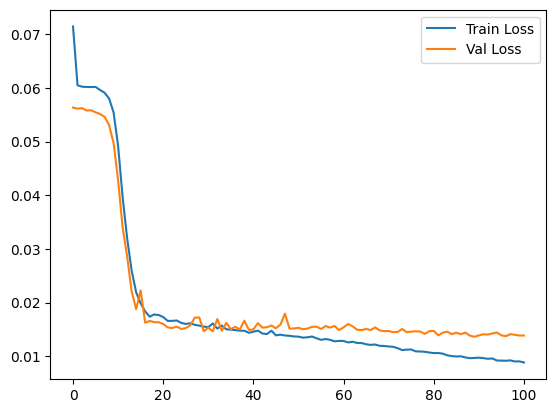

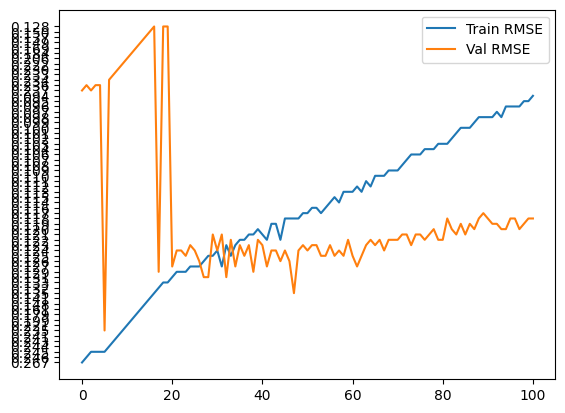

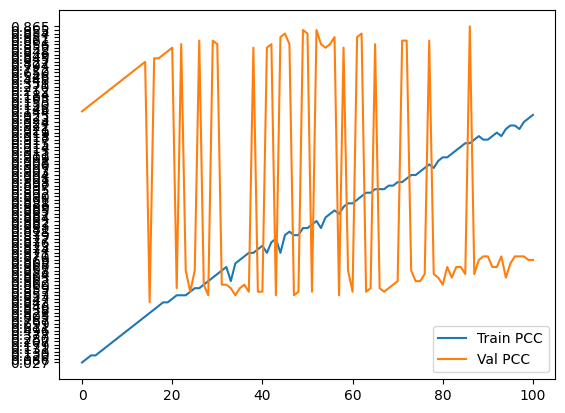

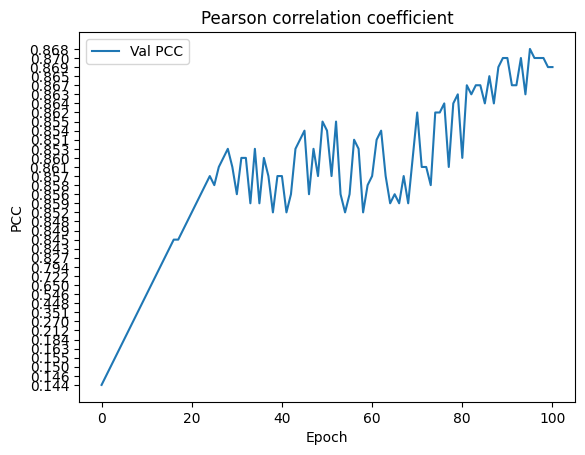

In [10]:
start_training(100,32)